In [68]:
import pandas as pd 
from sklearn.model_selection import train_test_split

animes = ['hunterX', 'dragonball', 'naruto', 'bnha']

df_animes = pd.read_csv('./Dataset/Anime2_Logit.csv')
# df_animes = df_animes.drop(columns=[f'Duration.{anime}' for anime in animes])


# Trabsformación binaria de Quality
for anime in animes:
    df_animes.loc[df_animes[f'Qual.{anime}'] < 5, f'Qual.{anime}'] = 0
    df_animes.loc[df_animes[f'Qual.{anime}'] >= 5, f'Qual.{anime}'] = 1

# Transformación categórica de Rating
for anime in animes:
    df_animes.loc[df_animes[f'Rating.{anime}'] <  20, f'Rating.{anime}'] = 0
    df_animes.loc[df_animes[f'Rating.{anime}'] >= 20, f'Rating.{anime}'] = 1
    df_animes.loc[df_animes[f'Rating.{anime}'] >= 30, f'Rating.{anime}'] = 2

# Transformación categórica de Duration
for anime in animes:
    df_animes.loc[df_animes[f'Duration.{anime}'] <  40, f'Duration.{anime}'] = 0
    df_animes.loc[df_animes[f'Duration.{anime}'] >= 40, f'Duration.{anime}'] = 1
    df_animes.loc[df_animes[f'Duration.{anime}'] >= 50, f'Duration.{anime}'] = 2

df_animes.head()

,Edad,Mujer,Eleccion,Combat.hunterX,Emotion.hunterX,Qual.hunterX,Duration.hunterX,Rating.hunterX,Combat.dragonball,Emotion.dragonball,...,Combat.naruto,Emotion.naruto,Qual.naruto,Duration.naruto,Rating.naruto,Combat.bnha,Emotion.bnha,Qual.bnha,Duration.bnha,Rating.bnha
0,42,1,dragonball,3,2,0,1,0,4,1,...,1,0,0,0,1,2,1,1,1,0
1,42,1,naruto,4,1,1,1,1,4,3,...,2,3,0,1,1,4,2,0,0,1
2,42,1,dragonball,2,1,0,1,1,2,2,...,1,2,0,1,1,2,1,1,1,1
3,42,1,dragonball,3,1,1,0,0,4,2,...,3,0,1,0,1,2,2,1,1,0
4,42,1,dragonball,1,1,1,1,1,4,2,...,3,0,1,1,0,1,2,0,1,0


In [69]:
# Separación de la base
X = df_animes.drop('Eleccion', axis=1)
y = df_animes['Eleccion'].astype('category')

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_train.head()

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Normalización
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=451, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) 
print((y_pred == y_test).sum()/y_test.size)

0.36363636363636365


In [71]:
from sklearn.naive_bayes import MultinomialNB

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# NB
nb = KNeighborsClassifier()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test) 
print((y_pred == y_test).sum()/y_test.size)

0.33914141414141413


In [66]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print((y_pred == y_test).sum()/y_test.size)

0.4080808080808081


In [67]:
from sklearn.svm import SVC

# Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print((y_pred == y_test).sum()/y_test.size)

0.4053030303030303


In [40]:
df_animes.describe()

,Edad,Mujer,Combat.hunterX,Emotion.hunterX,Qual.hunterX,Duration.hunterX,Rating.hunterX,Combat.dragonball,Emotion.dragonball,Qual.dragonball,...,Combat.naruto,Emotion.naruto,Qual.naruto,Duration.naruto,Rating.naruto,Combat.bnha,Emotion.bnha,Qual.bnha,Duration.bnha,Rating.bnha
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0000
mean,36.477000,0.490000,3.000000,1.416667,5.250000,46.666667,23.166667,2.416667,1.583333,5.666667,...,2.083333,1.333333,5.500000,42.166667,26.166667,1.583333,1.500000,5.833333,44.250000,19.5000
std,7.580782,0.499921,1.000042,0.759234,2.553699,8.055700,7.872572,1.441028,0.862043,1.972109,...,1.187367,1.312389,2.363006,9.290465,9.191260,1.187367,1.040876,2.544162,9.619176,10.4766
min,24.000000,0.000000,1.000000,0.000000,1.000000,31.000000,11.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,30.000000,12.000000,0.000000,0.000000,1.000000,31.000000,5.0000
25%,30.000000,0.000000,2.000000,1.000000,3.500000,40.500000,15.250000,1.750000,1.000000,4.000000,...,1.000000,0.000000,3.750000,33.500000,20.000000,0.750000,0.750000,4.000000,34.750000,11.0000
50%,36.000000,0.000000,3.000000,1.000000,6.000000,46.000000,24.500000,2.500000,1.500000,6.000000,...,2.500000,1.000000,6.000000,44.000000,23.500000,2.000000,2.000000,6.500000,46.500000,19.0000
75%,43.000000,1.000000,4.000000,2.000000,7.000000,52.000000,29.250000,4.000000,2.000000,7.250000,...,3.000000,3.000000,7.000000,48.500000,35.000000,2.000000,2.000000,8.000000,53.250000,26.5000
max,49.000000,1.000000,4.000000,3.000000,9.000000,59.000000,35.000000,4.000000,3.000000,8.000000,...,4.000000,3.000000,9.000000,56.000000,39.000000,4.000000,3.000000,9.000000,59.000000,37.0000


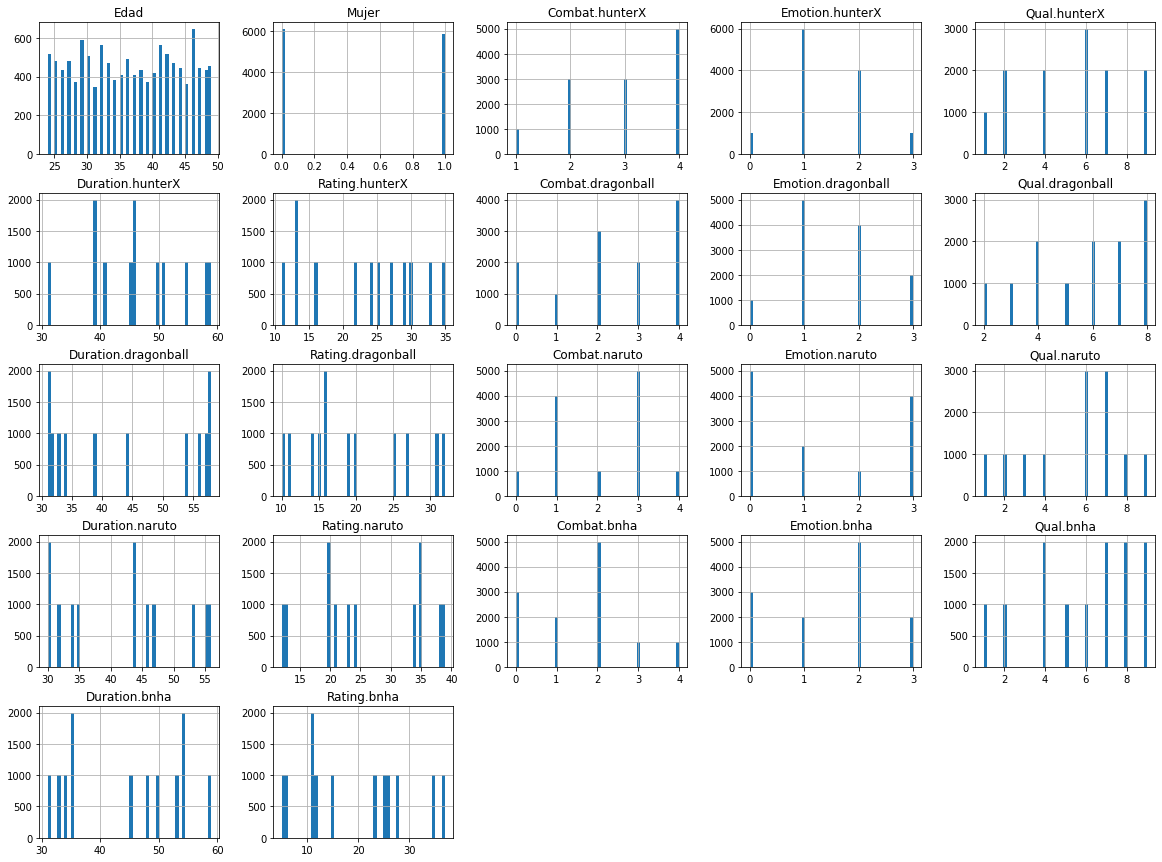

In [47]:
import matplotlib.pyplot as plt 
df_animes.hist(figsize=(20,15), bins=50)
plt.show()

In [ ]:
for col in df_animes.
df_animes['Qual']